## МГТУ им. Н. Э. Баумана
## Факультет: Информатика, искусственный интеллект и системы управления
## Кафедра: Системы обработки информации и управления
## Дисциплина: Методы машинного обучения
## Лабораторная работа №1 "Создание "истории о данных" (Data Storytelling)"
## Выполнил: Солохов И. Р. ИУ5-23М

Задание:

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
 - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
 - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
 - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
 - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
 - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [7]:
data = pd.read_csv('Football_teams.csv')
data.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [8]:
data.dtypes

Team             object
Tournament       object
Goals             int64
Shots pg        float64
yellow_cards      int64
red_cards         int64
Possession%     float64
Pass%           float64
AerialsWon      float64
Rating          float64
dtype: object

Рассмотрим распределение владения мячом по клубам

<AxesSubplot:xlabel='Possession%', ylabel='Density'>

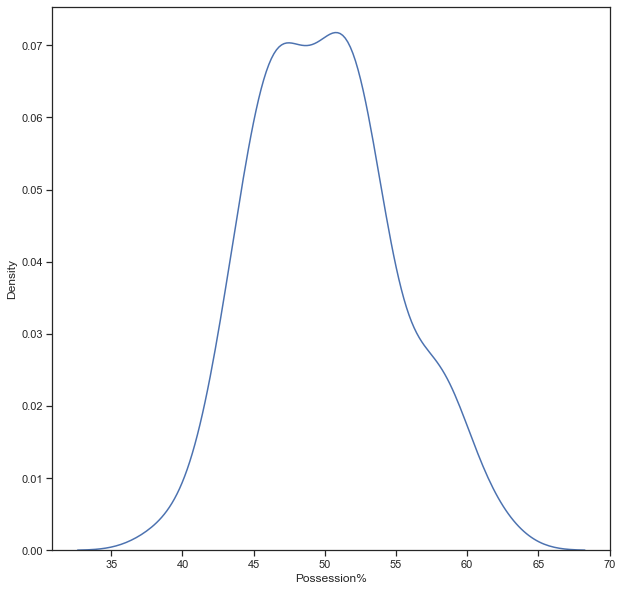

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data=data, x="Possession%")

Рассмотрим кол-во желтых карточек среди всех клубов

<AxesSubplot:xlabel='yellow_cards', ylabel='Count'>

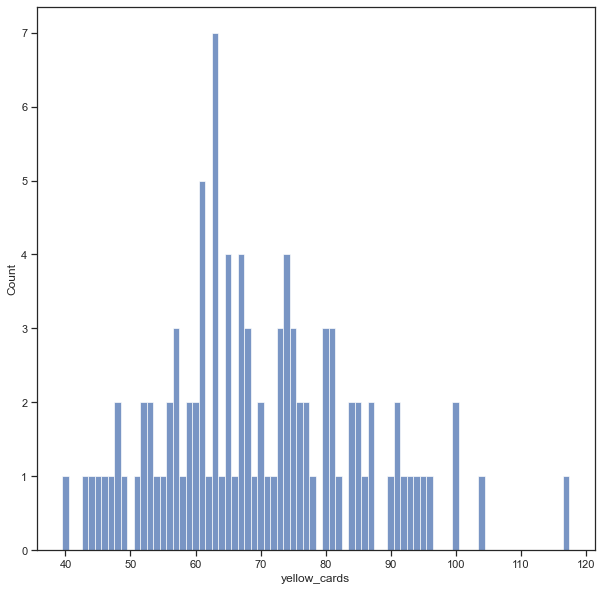

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data['yellow_cards'], discrete=True)

Рассмотрим зависимость количества голов от лиги на графике

<AxesSubplot:xlabel='Tournament', ylabel='Goals'>

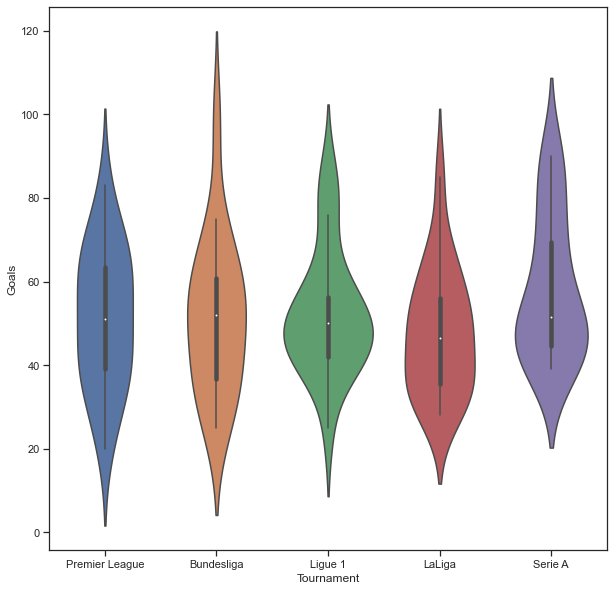

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='Tournament', y='Goals', data=data)

Из графика видно, что наибольшее количество голов было забито в Бундеслиге

<AxesSubplot:xlabel='red_cards', ylabel='Goals'>

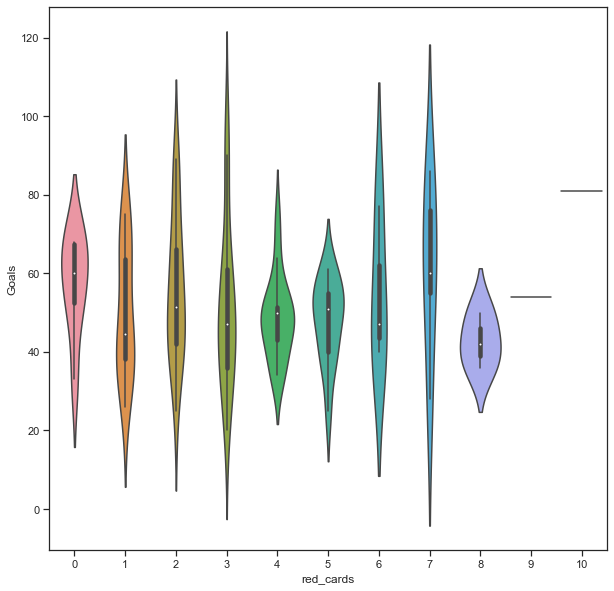

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='red_cards', y='Goals', data=data)

Из графика видно, что наибольшее количество голов забивали клубы, которые получали в 3 карточки за сезон

<AxesSubplot:xlabel='Rating', ylabel='Goals'>

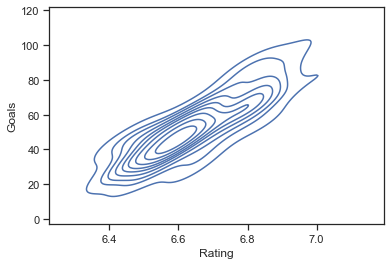

In [21]:
sns.kdeplot(data=data, x="Rating", y="Goals")

<AxesSubplot:xlabel='Possession%', ylabel='Pass%'>

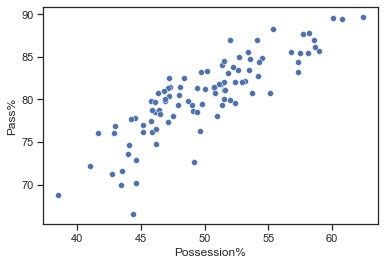

In [22]:
sns.scatterplot(x='Possession%', y='Pass%', data=data)

Text(0.5, 0.98, 'Корреляционные матрицы')

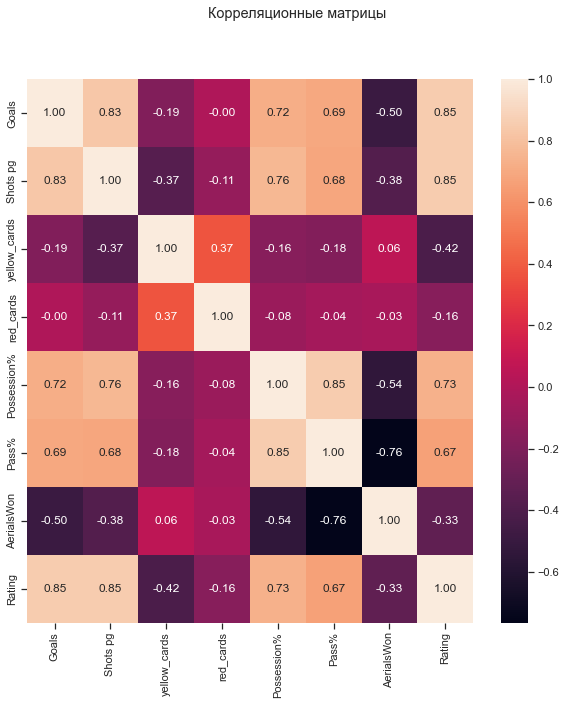

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы')

Построение диаграмм для набора данных

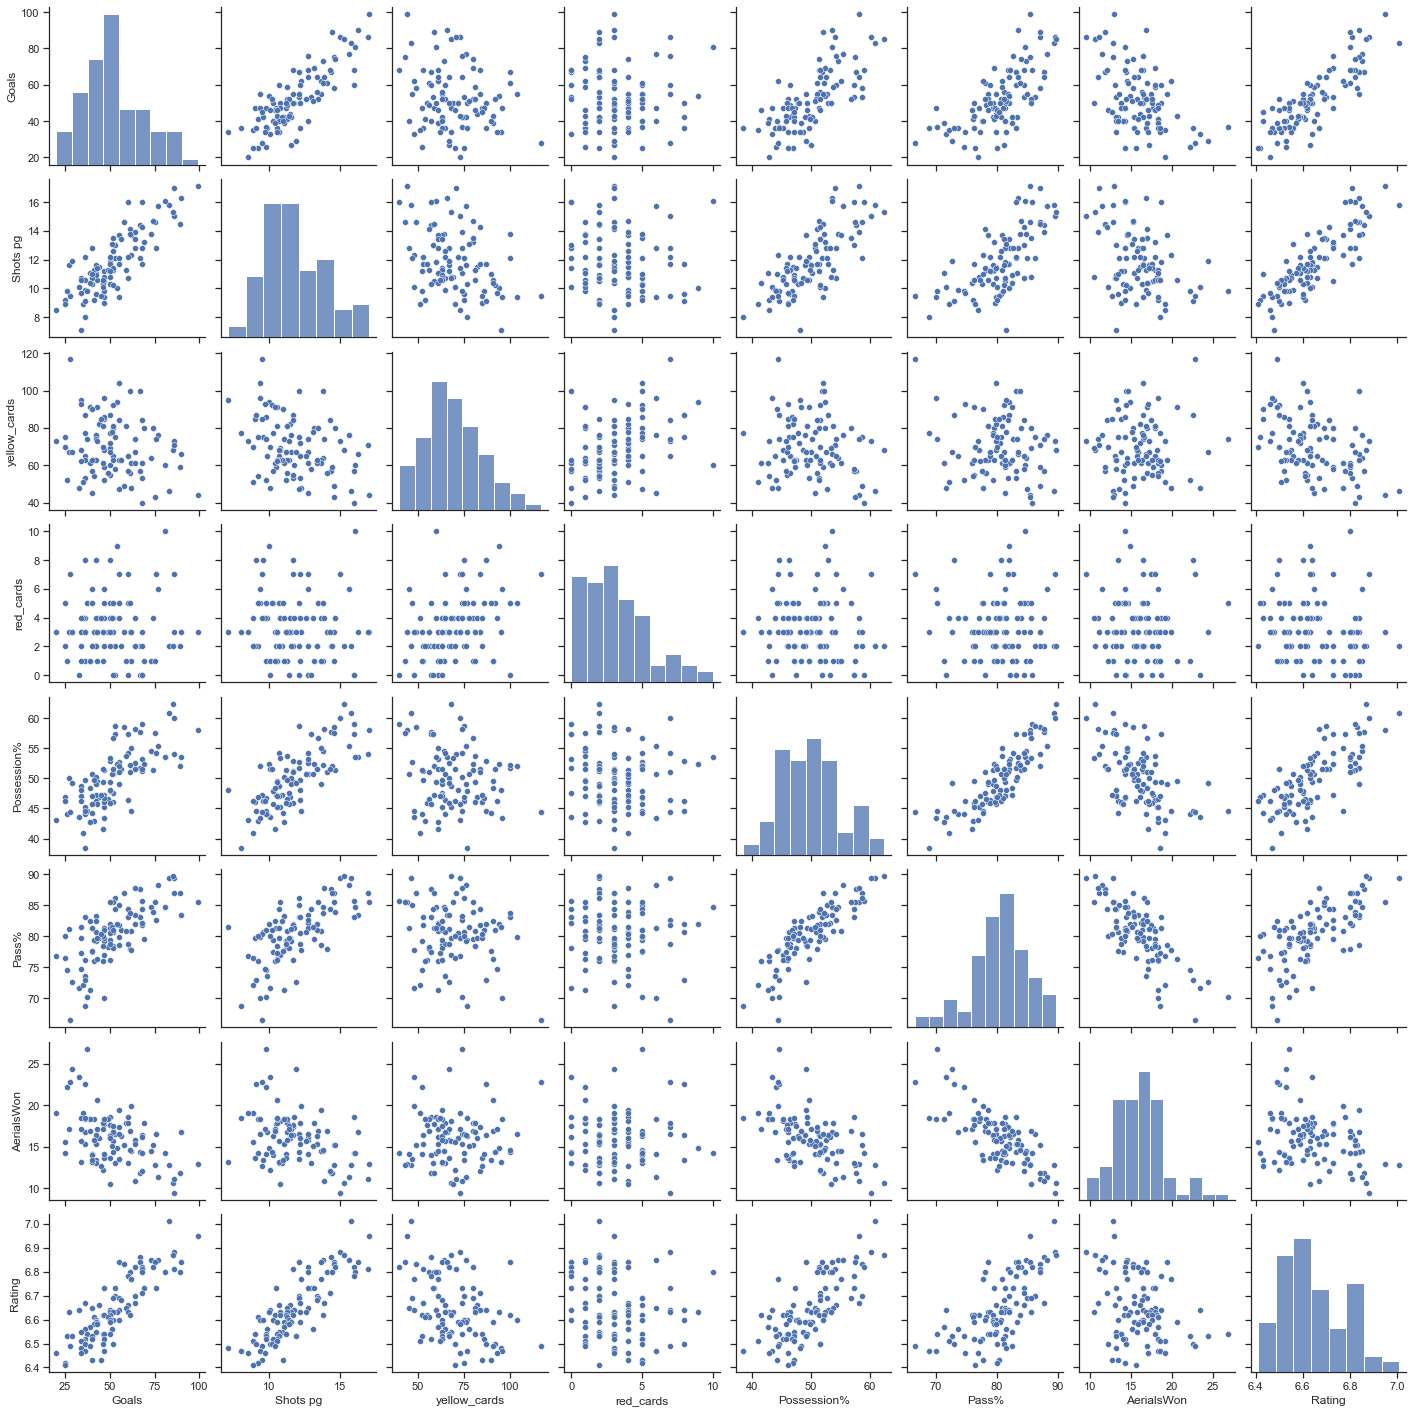

In [24]:
sns.pairplot(data)
plt.show()